In [2]:
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

In [ ]:
## read band structure data from csv files

folder_path = r'original_dataset_acoustic_metamaterial'

designs = []
band_structures = []

for file_name in os.listdir(folder_path):
    match = re.match(r'result_rstr_([\d.]+)_rcenter_([\d.]+)_rcorner_([\d.]+)\.csv', file_name)
    if match:  
        rstr = round(float(match.group(1)), 4)
        rcenter = round(float(match.group(2)), 4)
        rcorner = round(float(match.group(3)), 4)

        designs.append({'rstr': rstr, 'rcenter': rcenter, 'rcorner': rcorner})
        
    file_path = os.path.join(folder_path, file_name)
    csv_data = pd.read_csv(file_path, skiprows = 4) 
    csv_data['Eigenfrequency (kHz)'] = csv_data['Eigenfrequency (kHz)'].apply(
        lambda x: complex(x.replace('i', 'j'))) 
    band_structures.append(csv_data)


In [4]:
num_mode = 15
num_k = 61

BG_info = []

for i, design in enumerate(designs):
    data = band_structures[i]
    data['Frequency_real'] = data['Eigenfrequency (kHz)'].apply(lambda x: np.real(x))

    freq = data['Frequency_real'].values
    k_points = data['% k'].values
    
    for k in range(num_k):
        for mode in range(num_mode):
            BG_info.append({
                'design': design,
                'mode': mode + 1,
                'wavevector': k_points[k * num_mode + mode],
                'frequency': freq[k * num_mode + mode],
            })


## Visualization of dispersion relation

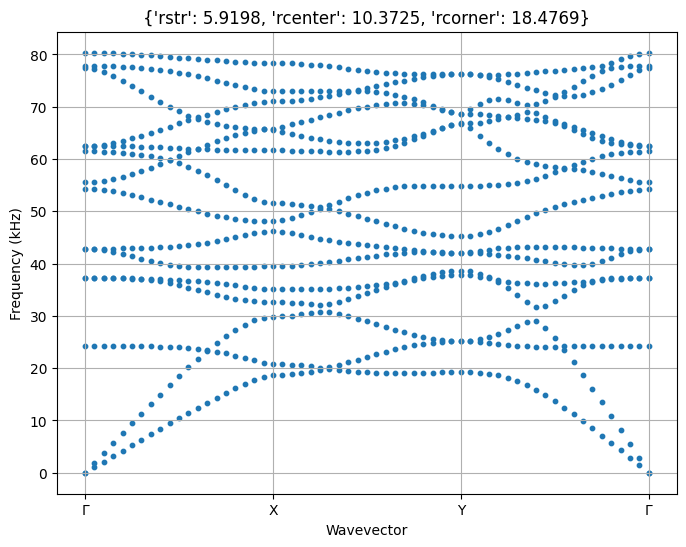

In [7]:
idx = 2

BG_df = pd.DataFrame(BG_info)

subset = BG_df.iloc[num_mode * num_k * (idx - 1) : num_mode * num_k * idx]
design_var = subset.iloc[0]['design'] 

plt.figure(figsize=(8, 6))
plt.scatter(subset['wavevector'], subset['frequency'], s=10)
plt.xlabel('Wavevector')
plt.ylabel('Frequency (kHz)')
high_sym_points = [0, 1, 2, 3]  # Γ, X, Y, Γ
plt.xticks(high_sym_points, labels=['Γ', 'X', 'Y', 'Γ'])
plt.title(design_var)
plt.grid(True)
plt.show()

## Save reformulated input-output pair

In [6]:
filename = "band_info_2D.csv"
data_rows = []

for item in BG_info:
    design = item['design']
    
    row = {
        'Strut Radius': design['rstr'],
        'Center Mass Radius': design['rcenter'],
        'Corner Mass Radius': design['rcorner']
    }
    
    row[f'Mode'] = item['mode']
    row[f'Wavevector'] = item['wavevector']
    row[f'Frequency'] = item['frequency']

    data_rows.append(row)

df = pd.DataFrame(data_rows)

# Save to CSV
df.to_csv(filename, index=False, float_format='%.4f')
print(f"Successfully saved results to {filename}")

Successfully saved results to band_info_2D.csv
